In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import subprocess

In [131]:
bestruns = pd.DataFrame()
for run in list(range(10,110)):
    for model in ["onestep_continual_geneflow", 
                  "onestep_continual_geneflow_4spp_oannsis", 
                  "onestep_continual_geneflow_4spp_ofrasis_early",
                  "onestep_continual_geneflow_4spp_ofrasis_late", 
                  "onestep_continual_geneflow_4spp_ofavsis_late"]:
        try:
            tmp = pd.read_csv("../calls/fastsimcoal2/" + 
                              model + "/run" + str(run) + "/" + model + "/" + 
                              model + ".bestlhoods", sep = "\t") 
            tmp["model"] = model
            tmp["run"] = run
            tmp["parameters"] = len(tmp.columns) - 6
            tmp = tmp[["model", "run", "parameters", "MaxEstLhood", "MaxObsLhood"]]
            bestruns = pd.concat([bestruns, tmp])            
        except:
            pass

In [129]:
bestruns = pd.DataFrame()
for run in list(range(10,110)):
    for model in ["onestep_continual_geneflow_4spp_oannsis"]:
        try:
            tmp = pd.read_csv("../calls/fastsimcoal2/" + 
                              model + "/run" + str(run) + "/" + model + "/" + 
                              model + ".bestlhoods", sep = "\t") 
            tmp["model"] = model
            tmp["run"] = run
            tmp["parameters"] = len(tmp.columns) - 6
            bestruns = pd.concat([bestruns, tmp])            
        except:
            pass

In [132]:
bestruns.value_counts("model")

model
onestep_continual_geneflow                       70
onestep_continual_geneflow_4spp_ofavsis_late     63
onestep_continual_geneflow_4spp_ofrasis_late     63
onestep_continual_geneflow_4spp_oannsis          57
onestep_continual_geneflow_4spp_ofrasis_early    35
dtype: int64

In [133]:
bestruns["MaxEstLhood"].median()

-113681754.046

In [138]:
bestruns["MaxEstLhood"][bestruns["model"] == "onestep_continual_geneflow_4spp_ofavsis_late"].mean()

-113463237.68801588

In [139]:
bestruns["MaxEstLhood"][bestruns["model"] == "onestep_continual_geneflow_4spp_ofrasis_late"].mean()

-113370110.35525398

In [140]:
bestruns["MaxEstLhood"][bestruns["model"] == "onestep_continual_geneflow_4spp_ofrasis_early"].mean()

-114251873.52394286

In [141]:
bestruns["MaxEstLhood"][bestruns["model"] == "onestep_continual_geneflow_4spp_oannsis"].mean()

-113478988.8632456

<Axes: xlabel='MaxEstLhood', ylabel='Density'>

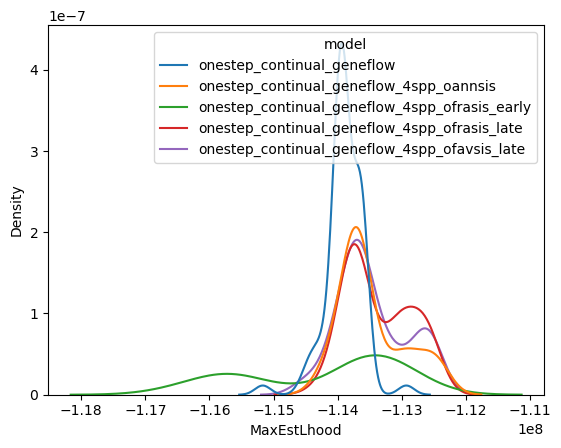

In [11]:
sns.kdeplot(data = bestruns, x = "MaxEstLhood", hue = "model")

In [74]:
bestmodel = pd.read_csv("../calls/fastsimcoal2/onestep_continual_geneflow_4spp_oannsis/run30/onestep_continual_geneflow_4spp_oannsis/onestep_continual_geneflow_4spp_oannsis.bestlhoods", sep = "\t")

In [75]:
bestmodel

,NPOP0,NPOP1,NPOP2,NGHOST,NANC0,NANC1,NANC2,TDIV2,0MIG01,0MIG10,...,1MIG20,1MIG02,1MIG21,1MIG12,2MIG01,2MIG10,TDIV1,TDIV0,MaxEstLhood,MaxObsLhood
0,52878,304008,68276,10239,18252,111234,74969,140205,0.000089,0.000012,...,0.00099,0.000144,0.037436,0.001392,0.002843,0.000479,95460,15121,-1.124289e+08,-1.093363e+08


In [57]:
%%bash
source ~/.bashrc
conda activate fsc
cd ../calls/fastsimcoal2/
mkdir -p ./boot_test
cd ./boot_test
cp /storage/group/ibb3/default/orbicella_popgen/calls/fastsimcoal2/onestep_continual_geneflow_4spp_oannsis/run30/onestep_continual_geneflow_4spp_oannsis/onestep_continual_geneflow_4spp_oannsis_maxL.par \
    ./onestep_continual_geneflow_4spp_oannsis.par
cp /storage/group/ibb3/default/orbicella_popgen/calls/fastsimcoal2/onestep_continual_geneflow_4spp_oannsis/run30/onestep_continual_geneflow_*.obs .

In [62]:
%%bash
source ~/.bashrc
conda activate fsc
cd ../calls/fastsimcoal2/boot_test
fsc27093 -i onestep_continual_geneflow_4spp_oannsis.par \
    -n100 -j -m -s0 -x -I -q

fastsimcoal was invoked with the following command line arguments:
fsc27093 -i onestep_continual_geneflow_4spp_oannsis.par -n100 -j -m -s0 -x -I -q 

Random generator seed : 38312

No population growth detected in input file

fastsimcoal2 is building 1000000 genealogies ...

Simulating 10000 independent chromosomes using 12 batches and 1 threads.


Iteration 1/1 done in 96.495 secs


Program total execution time: 96.500 seconds



In [76]:
for run in list(range(1,101)):
    for model in ["onestep_continual_geneflow_4spp_oannsis"]:
        task = "fsc_param_bootstrap"
        mem = "16"
        cpus = "4"
        temppath = "../calls/fastsimcoal2/"
        runpath = "../calls/fastsimcoal2/boot_test/onestep_continual_geneflow_4spp_oannsis/onestep_continual_geneflow_4spp_oannsis_" + str(run)
        tplprefix = model
        bestpath = "../calls/fastsimcoal2/onestep_continual_geneflow_4spp_oannsis/run30/onestep_continual_geneflow_4spp_oannsis"
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             temppath + " " + runpath + " " + tplprefix + " " + bestpath], shell=True)

Submitted batch job 11255633
Submitted batch job 11255634
Submitted batch job 11255635
Submitted batch job 11255636
Submitted batch job 11255637
Submitted batch job 11255638
Submitted batch job 11255639
Submitted batch job 11255640
Submitted batch job 11255641
Submitted batch job 11255642
Submitted batch job 11255643
Submitted batch job 11255644
Submitted batch job 11255645
Submitted batch job 11255646
Submitted batch job 11255647
Submitted batch job 11255648
Submitted batch job 11255649
Submitted batch job 11255650
Submitted batch job 11255651
Submitted batch job 11255652
Submitted batch job 11255653
Submitted batch job 11255654
Submitted batch job 11255655
Submitted batch job 11255656
Submitted batch job 11255657
Submitted batch job 11255658
Submitted batch job 11255659
Submitted batch job 11255660
Submitted batch job 11255661
Submitted batch job 11255662
Submitted batch job 11255663
Submitted batch job 11255664
Submitted batch job 11255665
Submitted batch job 11255666
Submitted batc

In [52]:
bestruns = pd.DataFrame()
for run in list(range(1,101)):
    for model in ["onestep_continual_geneflow_4spp_oannsis"]:
        try:
            tmp = pd.read_csv("../calls/fastsimcoal2/boot_test/" + 
                              model + "/" + model + "_" + str(run) + "/" + model + "/" +
                              model + ".bestlhoods", sep = "\t") 
            tmp["model"] = model
            tmp["run"] = run
            tmp["parameters"] = len(tmp.columns) - 6
            bestruns = pd.concat([bestruns, tmp])            
        except:
            pass
bestruns = bestruns[bestruns["NPOP0"].notna()].reset_index(drop=True)

In [53]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [54]:
param_intervals = pd.DataFrame()
for params in bestruns.columns[0:30]:
    interval = mean_confidence_interval(bestruns[params])
    mean = interval[0]
    low = interval[1]
    high = interval[2]
    tmp = pd.DataFrame([[mean, low, high, params]], 
             columns = ["Mean Value", "5%", "95%", "Parameter"])
    param_intervals = pd.concat([param_intervals, tmp]).reset_index(drop=True)

In [55]:
param_intervals = param_intervals.set_index("Parameter")

In [56]:
param_intervals

,Mean Value,5%,95%
Parameter,,,
NPOP0,53154.424242,52715.660312,53593.188173
NPOP1,258336.333333,249375.997393,267296.669274
NPOP2,69944.777778,68881.191984,71008.363571
NGHOST,10583.292929,10504.837316,10661.748543
NANC0,18045.939394,17794.963449,18296.915339
NANC1,149901.676768,137487.630098,162315.723437
NANC2,96517.989899,85439.891083,107596.088715
TDIV2,132906.050505,129011.321089,136800.779922
0MIG01,0.000088,0.000086,0.000090


In [42]:
!cp ../calls/fastsimcoal2/onestep_continual_geneflow_4spp_oannsis.tpl \
    ../calls/fastsimcoal2/bootstrapped.par

In [43]:
for i in param_intervals.index.tolist():
    subprocess.run(["sed -i 's/" + i + "/" + str(param_intervals["Mean Value"][i]) + "/g' " + 
                    "../calls/fastsimcoal2/bootstrapped.par"], shell = True)

In [49]:
!cat ../calls/fastsimcoal2/bootstrapped.par

//Parameters for the coalescence simulation program : fsimcoal2.exe
4 samples to simulate :
//Population effective sizes (number of genes)
53139.02272727273
257683.48863636365
69746.71590909091
10583.318181818182
//Samples sizes and samples age
46
46
46
0
//Growth rates  : negative growth implies population expansion
0
0
0
0
//Number of migration matrices : 0 implies no migration between demes
4
//Current migration matrix 0
0 1.2580982954545456e-05 1.2478032954545456e-05 1.2479992045454546e-05
8.83813159090909e-05 0 0.00016275253522727272 0.001538884090909091
1.3287160227272729e-05 0.0001879050556818182 0 0.00016069184659090908
3.826332727272727e-05 5.159063295454546e-05 2.8266689772727275e-05 0
//Current migration matrix 1
0 0.01076968396590909 0.007584853152272727 0
0.004537943138636364 0 0.022977339929545457 0
0.00015878004431818182 0.0005852573659090908 0 0
0 0 0 0
//Current migration matrix 2
0 0.002741753001136363 0 0
0.0036316617272727277 0 0 0
0 0 0 0
0 0 0 0
//Historical migra

In [47]:
%%bash
source ~/.bashrc
conda activate assembly
cd ..
Rscript ParViewer.R ./calls/fastsimcoal2/bootstrapped.par

Loading required package: shape


null device 
          1 


In [48]:
!ls -lh ../calls/fastsimcoal2/

total 152K
drwxrwsr-x 2 nsl5160 ibb3_collab 4.0K Apr 22 12:36 boot_test
-rw-rw-r-- 1 nsl5160 ibb3_collab 1.6K Apr 23 09:54 bootstrapped.par
-rw-rw-r-- 1 nsl5160 ibb3_collab  37K Apr 23 10:11 bootstrapped.par.pdf
-rw-rw-r-- 1 nsl5160 ibb3_collab 1.6K Apr 23 09:53 bootstrapped.tpl
drwxrwsr-x 2 nsl5160 ibb3_collab 4.0K Apr  4 06:41 onestep_continual_geneflow
-rw-rw-r-- 1 nsl5160 ibb3_collab  798 Mar 23 16:54 onestep_continual_geneflow.est
-rw-rw-r-- 1 nsl5160 ibb3_collab  961 Mar 23 16:27 onestep_continual_geneflow.tpl
drwxrwsr-x 2 nsl5160 ibb3_collab 4.0K Apr  4 02:05 onestep_continual_geneflow_4spp_oannsis
-rw-rw-r-- 1 nsl5160 ibb3_collab 1.5K Mar 23 16:55 onestep_continual_geneflow_4spp_oannsis.est
-rw-rw-r-- 1 nsl5160 ibb3_collab 1.2K Mar 23 16:21 onestep_continual_geneflow_4spp_oannsis.tpl
drwxrwsr-x 2 nsl5160 ibb3_collab 4.0K Apr 22 11:55 onestep_continual_geneflow_4spp_oannsis_boot
-rw-rw-r-- 1 nsl5160 ibb3_collab 1.5K Apr 22 11:50 onestep_continual_geneflow_4spp_oannsis_boot.est
-